In [25]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

import tensorflow as tf
import numpy as np
import pandas as pd

import random
import glob
import os
import math

from torch.utils.data import Dataset,DataLoader,random_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 


In [26]:

seed=42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [27]:
#############################################################
################   DataLoader  ##############################
#############################################################


class CustomDataset(Dataset):

    # 생성자, 데이터를 전처리 하는 부분
    def __init__(self, folder_path):
        self.data = []
        window_size=144
        # 폴더 안에 있는 모든 CSV 파일을 읽음
        csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
        for csv_file in csv_files:
            df = pd.read_csv(csv_file)
            # 3열을 feature, 2열을 label로 사용
            features = df.iloc[:, [3,4,5]].values.astype('float32')
            labels = df.iloc[:, 2].values.astype('float32')
            # feature를 144개씩 묶음
            for i in range(len(features)-window_size):
                feature_subset = features[i:i+window_size]
                label_subset = labels[i+window_size]
                #feature_subset = torch.unsqueeze(torch.FloatTensor(feature_subset), dim=1)
                self.data.append((feature_subset, label_subset))

    # 데이터셋의 총 길이를 반환하는 부분 
    def __len__(self):
        # 데이터셋의 길이를 반환
        return len(self.data)

    def __getitem__(self, idx):

        # 주어진 인덱스에 해당하는 데이터 반환
        features, labels = self.data[idx]
        inp = torch.FloatTensor(features)
        outp = torch.FloatTensor([labels])
        return inp, outp
    
# instance 생성 
dataset = CustomDataset("../98. IOT_journal/preprocessed_data/data_13/train")
# dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# train,test 분리 
val_ratio = 0.2 
val_size = int(val_ratio * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


# Create dataloaders for train and validation
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)


# for batch_idx, samples in enumerate(val_dataloader):
#     x_val, y_val = samples
#     print(x_val.size())
#     print(y_val.size())

In [28]:
#load model
from models.encoder import Encoder

device = torch.device('cuda:2')
model=Encoder(input_size=3,
                num_predicted_features=1,
                d_model=128,
                head=4,
                d_ff=32,
                max_len=144,
                dropout=0.2,
                n_layers=4,
                ).to(device)
model.load_state_dict(torch.load('./pt/model_epoch_50_val_loss_0.0118.pt'))



<All keys matched successfully>

In [29]:
import torch
import torch.nn.functional as F
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 평가 모드로 설정 (불필요한 노드 같은거 다 꺼버린 채로 실행됨.)
model.eval()

# 예측값과 실제값을 저장할 리스트 초기화
predictions = []
targets = []

# 배치별로 데이터를 가져와서 예측값과 실제값 저장
with torch.no_grad():
    for batch,samples in enumerate(val_dataloader):
        x_val, y_val = samples
        inputs = x_val.to(device)  # 입력 데이터 (배치) #64,144,3
        labels = y_val.to(device)  # 실제 레이블 (배치) # 64,1
        
        # 모델에 입력 데이터 전달하여 예측 수행
        outputs = model(inputs)
        print(outputs.size())  # [64, 138]
        print(labels.size())   # [64, 1]
        # 예측값과 실제값을 리스트에 추가
        predictions.extend(outputs.tolist())
        targets.extend(labels.tolist())

# 리스트를 텐서로 변환
predictions = torch.tensor(predictions)
targets = torch.tensor(targets)



torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])


torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])


In [30]:

# 성능지표
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 


def SMAPE(y_test, y_pred):
	return np.mean((np.abs(y_test-y_pred))/(np.abs(y_test)+np.abs(y_pred)))*100

mae = mean_absolute_error(targets, predictions)
mse = mean_squared_error(targets, predictions)
r2=r2_score(targets, predictions)
rmse= np.sqrt(mean_squared_error(targets, predictions))

print("모델 성능지표 ")
# print('MAPE: ', MAPE(targets, predictions))
# print('SMAPE', SMAPE(targets, predictions))
print("R2 :", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE :", rmse)

모델 성능지표 
R2 : 0.9972269122654567
MAE: 0.011765934
MSE: 0.00022686784
RMSE : 0.015062133


In [31]:

class TestDataset(Dataset):

    # 생성자, 데이터를 전처리 하는 부분
    def __init__(self, folder_path):
        self.data = []
        window_size=144
        # CSV로 돌림.
        csv_file = folder_path
        df = pd.read_csv(csv_file)
        # 3열을 feature, 2열을 label로 사용
        features = df.iloc[:, [3,4,5]].values.astype('float32')
        labels = df.iloc[:, 2].values.astype('float32')
        # feature를 144개씩 묶음
        for i in range(len(features)-window_size):
            feature_subset = features[i:i+window_size]
            label_subset = labels[i+window_size]
            #feature_subset = torch.unsqueeze(torch.FloatTensor(feature_subset), dim=1)
            self.data.append((feature_subset, label_subset))

    # 데이터셋의 총 길이를 반환하는 부분 
    def __len__(self):
        # 데이터셋의 길이를 반환
        return len(self.data)

    def __getitem__(self, idx):

        # 주어진 인덱스에 해당하는 데이터 반환
        features, labels = self.data[idx]
        # 뒤에 차원을 늘려주는것.
        #features = features.expand(-1, 5)
        inp = torch.FloatTensor(features)
        outp = torch.FloatTensor([labels])
        
        return inp, outp

In [32]:
# file_name=("../98. IOT_journal/preprocessed_data/data_13/test/00000419109b001329704b6c.csv")
#file_name=("../98. IOT_journal/preprocessed_data/data_13/test/00000419109b001329704b11.csv")
file_name=("../98. IOT_journal/preprocessed_data/data_13/test/00000419109b001329704b20.csv")

test_data=TestDataset(file_name)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

model.eval()
# 예측값과 실제값을 저장할 리스트 초기화
y_pred_list = []
y_list = []
with torch.no_grad():
    for index,samples in enumerate(test_dataloader):
        x,y_label=samples 

        x = x.to(device)   # [64, 144, 1]
        y_label = y_label.to(device)  # [64, 1]
        print(x.size())
        print(y_label.size())
        y_pred=model(x)  # type torch


        y_pred_list.extend(y_pred.tolist()) # type list
        y_list.extend(y_label.tolist())     # type list
    

    y_pred_list=np.array(y_pred_list)
    y_pred_list=y_pred_list.reshape(y_pred_list.shape[0],1)
    y_list=np.array(y_list)
    y_list=y_list.reshape(y_list.shape[0],1)
    


    print("초기 x 입력:",x.size()) 
    print("초기 y 입력:", y_pred_list.shape)
    print("y_pred :",y_list.shape)


torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size([64, 144, 3])
torch.Size([64, 1])
torch.Size

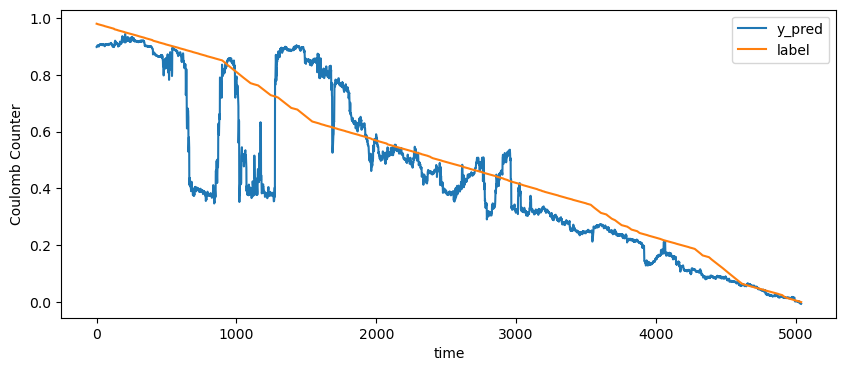

In [33]:
import matplotlib.pyplot as plt


def make_graph(y_pred,label):
    for i in range(0,len(y_pred)):
        y_pred[i]=1-y_pred[i]

    for i in range(0,len(label)):
        label[i]=1-label[i]

    plt.figure(figsize=(10,4))
    plt.xlabel("time")
    plt.ylabel("Coulomb Counter")
    plt.plot(y_pred)
    plt.plot(label)
    plt.legend(['y_pred','label'])

make_graph(y_pred_list,y_list)

In [34]:
df = pd.read_csv(file_name)
voltage= df.iloc[:, 3].values[144:]
# voltage= df.iloc[:, 3]
voltage_reshaped = np.reshape(voltage, (voltage.shape[0], 1))

print("전압 원본 :",voltage_reshaped.shape)
print("누적 전류 원본 :",y_list.shape)
print("누적 전류 예측 :",y_pred_list.shape)


전압 원본 : (5040, 1)
누적 전류 원본 : (5040, 1)
누적 전류 예측 : (5040, 1)


In [35]:
inverse_y_pred=[]
for i in range(0,len(y_pred_list)):
    k=1-y_pred_list[i]
    inverse_y_pred.append(k)
print(len(inverse_y_pred))

inverse_y_list=[]
for i in range(0,len(y_list)):
    k=1-y_list[i]
    inverse_y_list.append(k)
print(len(inverse_y_list))

5040
5040


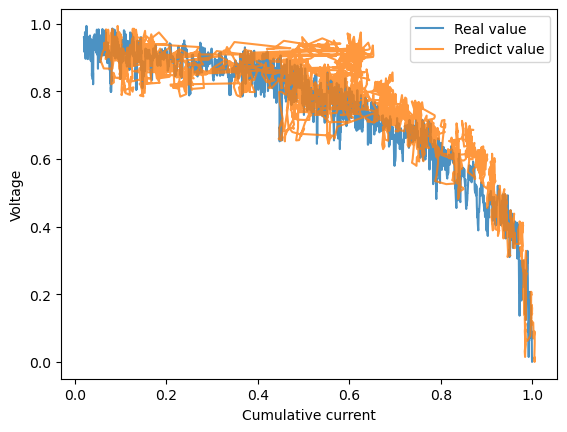

In [36]:


plt.xlabel("Cumulative current")
plt.ylabel("Voltage")

plt.plot(inverse_y_list,voltage_reshaped,label="Real value",alpha=0.8)
plt.plot(inverse_y_pred,voltage_reshaped, label="Predict value",alpha=0.8)
plt.legend(loc="upper right")

